# **Sprint 2 - Desenvolvimento do Modelo** 

Nesta Sprint vamos fazer as seguintes atividades:

* **Escolha do Algoritmo:** Aqui, selecionaremos o algoritmo de classificação mais apropriado para o nosso projeto, com base nas características dos dados.

* **Treinamento do Modelo:** Usando os dados preparados na Sprint 1, treinaremos o modelo de classificação. Isso envolve o ajuste dos parâmetros do algoritmo e a otimização do desempenho.

* **Avaliação de Desempenho:** Avaliaremos o desempenho do modelo com diversas métricas de qualidade, garantindo que ele atenda aos nossos critérios de sucesso.


## Bibliotecas Utilizadas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from joblib import dump, load

import warnings
warnings.simplefilter(action='ignore')

## Carregando o Conjunto de Dados

In [6]:
df = pd.read_csv('../datasets/estudo_sono_tratado.csv')
df.head() # Visualizando os primeiros registros

,ID,sexo,idade,ocupacao,horas_de_sono,qualidade_do_sono,nivel_atividade_fisica,nivel_stress,categoria_IMC,pressao_sanguinea,frequencia_cardiaca,passos_diarios,disturbio_do_sono,tem_disturbio_do_sono
0,1,Masculino,27,Engenheiro de Software,6.1,6,42,6,Sobrepeso,126/83,77,4200,Nenhum,False
1,2,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000,Nenhum,False
2,3,Masculino,28,Médico,6.2,6,60,8,Normal,125/80,75,10000,Nenhum,False
3,4,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,140/90,85,3000,Apneia do Sono,True
4,5,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,140/90,85,3000,Apneia do Sono,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      374 non-null    int64  
 1   sexo                    374 non-null    object 
 2   idade                   374 non-null    int64  
 3   ocupacao                374 non-null    object 
 4   horas_de_sono           374 non-null    float64
 5   qualidade_do_sono       374 non-null    int64  
 6   nivel_atividade_fisica  374 non-null    int64  
 7   nivel_stress            374 non-null    int64  
 8   categoria_IMC           374 non-null    object 
 9   pressao_sanguinea       374 non-null    object 
 10  frequencia_cardiaca     374 non-null    int64  
 11  passos_diarios          374 non-null    int64  
 12  disturbio_do_sono       374 non-null    object 
 13  tem_disturbio_do_sono   374 non-null    bool   
dtypes: bool(1), float64(1), int64(7), object(5

## **Pré-Processamento dos Dados para utilização no Modelo**

In [9]:
# Convertendo a coluna 'pressao_sanguinea' para duas colunas separadas de pressão sistólica e diastólica
df[['pressao_sistolica', 'pressao_diastolica']] = df['pressao_sanguinea'].str.split('/', expand=True)

# Excluindo a coluna original 'pressao_sanguinea'
df.drop('pressao_sanguinea', axis=1, inplace=True)

# Transformando os novos dados em INT:
df['pressao_diastolica'] = df['pressao_diastolica'].astype('int')
df['pressao_sistolica'] = df['pressao_sistolica'].astype('int')
df.head()

,ID,sexo,idade,ocupacao,horas_de_sono,qualidade_do_sono,nivel_atividade_fisica,nivel_stress,categoria_IMC,frequencia_cardiaca,passos_diarios,disturbio_do_sono,tem_disturbio_do_sono,pressao_sistolica,pressao_diastolica
0,1,Masculino,27,Engenheiro de Software,6.1,6,42,6,Sobrepeso,77,4200,Nenhum,False,126,83
1,2,Masculino,28,Médico,6.2,6,60,8,Normal,75,10000,Nenhum,False,125,80
2,3,Masculino,28,Médico,6.2,6,60,8,Normal,75,10000,Nenhum,False,125,80
3,4,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,85,3000,Apneia do Sono,True,140,90
4,5,Masculino,28,Representante de Vendas,5.9,4,30,8,Obeso,85,3000,Apneia do Sono,True,140,90


In [10]:
# Criando variaveis dummies
df = pd.get_dummies(df, columns=['sexo', 'ocupacao', 'categoria_IMC'], drop_first=True, dtype='int')
df.head()

,ID,idade,horas_de_sono,qualidade_do_sono,nivel_atividade_fisica,nivel_stress,frequencia_cardiaca,passos_diarios,disturbio_do_sono,tem_disturbio_do_sono,...,ocupacao_Engenheiro,ocupacao_Engenheiro de Software,ocupacao_Gerente,ocupacao_Médico,ocupacao_Professor,ocupacao_Representante de Vendas,ocupacao_Vendedor(a),categoria_IMC_Obeso,categoria_IMC_Peso Normal,categoria_IMC_Sobrepeso
0,1,27,6.1,6,42,6,77,4200,Nenhum,False,...,0,1,0,0,0,0,0,0,0,1
1,2,28,6.2,6,60,8,75,10000,Nenhum,False,...,0,0,0,1,0,0,0,0,0,0
2,3,28,6.2,6,60,8,75,10000,Nenhum,False,...,0,0,0,1,0,0,0,0,0,0
3,4,28,5.9,4,30,8,85,3000,Apneia do Sono,True,...,0,0,0,0,0,1,0,1,0,0
4,5,28,5.9,4,30,8,85,3000,Apneia do Sono,True,...,0,0,0,0,0,1,0,1,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                374 non-null    int64  
 1   idade                             374 non-null    int64  
 2   horas_de_sono                     374 non-null    float64
 3   qualidade_do_sono                 374 non-null    int64  
 4   nivel_atividade_fisica            374 non-null    int64  
 5   nivel_stress                      374 non-null    int64  
 6   frequencia_cardiaca               374 non-null    int64  
 7   passos_diarios                    374 non-null    int64  
 8   disturbio_do_sono                 374 non-null    object 
 9   tem_disturbio_do_sono             374 non-null    bool   
 10  pressao_sistolica                 374 non-null    int32  
 11  pressao_diastolica                374 non-null    int32  
 12  sexo_Mas

## **Escolha do Algoritmo**

Neste projeto, serão utilizados três algoritmos de classificação para modelar e prever os resultados desejados. Cada um desses algoritmos tem características distintas, oferecendo diferentes vantagens em termos de desempenho e interpretabilidade.

### **1. RandomForest**

O RandomForest é um modelo baseado em conjunto que combina as previsões de várias árvores de decisão para obter uma previsão mais robusta e geral. 

Este modelo é conhecido por sua eficácia em lidar com uma variedade de conjuntos de dados e sua resistência ao overfitting.

### **2. Logistic Regression**

O Logistic Regression é uma técnica de regressão utilizada para problemas de classificação binária. Apesar da sua simplicidade, a Regressão Logística é rápida e fácil de interpretar. 

É especialmente eficaz quando a relação entre as features e a variável de destino é predominantemente linear.

### **3. Decision Tree**

O Decision Tree é um modelo de árvore de decisão que divide iterativamente o conjunto de dados em subconjuntos mais puros. 

Apesar de sua simplicidade e interpretabilidade, as árvores de decisão podem ser propensas a sobreajuste, ajustando-se demais aos dados de treinamento.

## **Treinamento do Modelo**

Para iniciarmos o treinamento do modelo, vamos separar os dados para treino e teste.

Mas antes, vamos excluir algumas variáveis que não vamos utilizar nos modelos. São elas:

- **ID** : Não faz sentido utilizarmos essa variável de identificação
- **'tem_disturbio_do_sono'** e '**disturbio_do_sono'**: Não vamos utilizar essa variáveis pois elas possuem a resposta que nosso modelo irá responder

Após retiradas as variáveis acima, vamos utilizar o train_test_split do scikit-learn para separar nossos dados de treino e teste.

In [16]:
# Dividindo base de treino e teste:
X = df.drop(['ID', 'tem_disturbio_do_sono', 'disturbio_do_sono'], axis=1)
y = df['tem_disturbio_do_sono']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

Para o treinamento dos modelos, vamos utilizar a função do scikit-learn GridSearchCV.

O GridSearchCV encontra os melhores hiperparâmetros para um modelo por meio da busca em uma grade de valores possíveis para esses hiperparâmetros. Além disso, ele também divide o conjunto de dados em partes (folds) e avalia o desempenho do modelo usando validação cruzada em cada combinação de hiperparâmetros. 

In [18]:
# Definindo os hiperparâmetros que deseja otimizar para cada modelo
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Criando os classificadores
rf_classifier = RandomForestClassifier(random_state=23)
lr_classifier = LogisticRegression(random_state=23)
dt_classifier = DecisionTreeClassifier(random_state=23)

# Use GridSearchCV para encontrar os melhores hiperparâmetros para cada modelo
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_lr = GridSearchCV(lr_classifier, param_grid_lr, cv=5, scoring='accuracy')
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

# Treinar os modelos com os melhores hiperparâmetros
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros para cada modelo
print("Melhores hiperparametros para RandomForest:", grid_search_rf.best_params_)
print("Melhores hiperparametros para Logistic Regression:", grid_search_lr.best_params_)
print("Melhores hiperparametros para Decision Tree:", grid_search_dt.best_params_)

Melhores hiperparametros para RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Melhores hiperparametros para Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Melhores hiperparametros para Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


Acima vimos que o Grid Search CV encontrou os melhores parâmetros para cada algorítimo de classificação.

## **Avaliação de Desempenho**

Para avaliação dos algoritmos, vamos utilizar seis métricas:

- **Acurácia:**
Mede a proporção de predições corretas em relação ao total de predições.

- **Precisão:**
Mede a proporção de instâncias positivas previstas corretamente em relação ao total de instâncias positivas previstas.

- **Recall**
Mede a proporção de instâncias positivas previstas corretamente em relação ao total de instâncias positivas reais.

- **F1-Score:**
É a média harmônica entre precisão e recall.

- **AUC-ROC:**
É uma métrica que avalia o desempenho do modelo em diferentes pontos de corte de probabilidade.
Um valor próximo de 1.0 indica um bom desempenho.

- **Matriz de Confusão:**
A matriz de confusão é uma tabela que mostra a distribuição dos resultados da classificação em cada classe.
Fornece uma visão detalhada dos resultados do modelo, incluindo verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

In [22]:
# Função para avaliar e imprimir métricas
def avalia_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Acurácia
    acuracia = accuracy_score(y_test, y_pred)
    print("Acurácia:", round(acuracia,2))
    
    # Precisão
    precisao = precision_score(y_test, y_pred)
    print("Precisão:", round(precisao,2))
    
    # Recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", round(recall,2))
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", round(f1,2))
    
    # AUC-ROC 
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_probs)
        print("AUC-ROC:", round(auc_roc,2))
    
    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    
    # Criar um mapa de calor usando seaborn
    plt.figure(figsize=(3, 3))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False)
    plt.xlabel('Predições')
    plt.ylabel('Valores Reais')
    plt.show()



Avaliação do RandomForest:
Acurácia: 0.95
Precisão: 0.93
Recall: 0.93
F1-Score: 0.93
AUC-ROC: 0.92
Matriz de Confusão:
[[46  2]
 [ 2 25]]


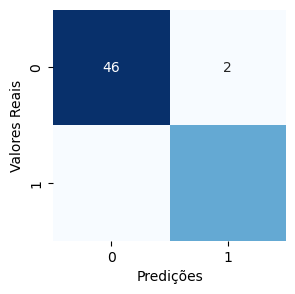


Avaliação do Logistic Regression:
Acurácia: 0.95
Precisão: 0.93
Recall: 0.93
F1-Score: 0.93
AUC-ROC: 0.92
Matriz de Confusão:
[[46  2]
 [ 2 25]]


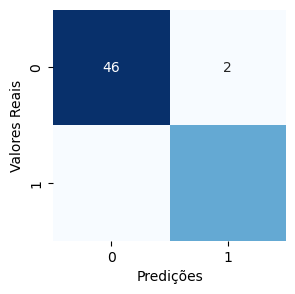


Avaliação do Decision Tree:
Acurácia: 0.95
Precisão: 0.93
Recall: 0.93
F1-Score: 0.93
AUC-ROC: 0.93
Matriz de Confusão:
[[46  2]
 [ 2 25]]


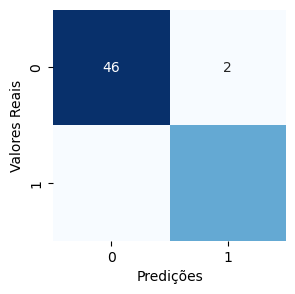

In [23]:
# Avaliando os modelos criados:
# RandomForest
print("\nAvaliação do RandomForest:")
avalia_modelo(grid_search_rf.best_estimator_, X_test, y_test)

# Logistic Regression
print("\nAvaliação do Logistic Regression:")
avalia_modelo(grid_search_lr.best_estimator_, X_test, y_test)

# Decision Tree
print("\nAvaliação do Decision Tree:")
avalia_modelo(grid_search_dt.best_estimator_, X_test, y_test)

## **Conclusão**

Na escolha do modelo para nosso projeto, decidimos apostar no Logistic Regression como nossa ferramenta principal. A decisão baseia-se em resultados consistentes e similarmente sólidos entre RandomForest, Decision Tree e Logistic Regression. Optamos pelo Logistic Regression devido à sua simplicidade e interpretabilidade, uma escolha que faz sentido para o tamanho de nossa base de dados e facilita a compreensão do funcionamento do modelo. 

In [26]:
# Salvando o modelo Logistc Regression para uso:

dump(grid_search_lr.best_estimator_, '../modelos/modelo_logistic_regression.joblib')

['../modelos/modelo_logistic_regression.joblib']